<a href="https://colab.research.google.com/github/Gus-1003/DataScience/blob/main/Coleta_Analise_Avalia%C3%A7%C3%A3o2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas necessárias:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import requests as rq
from bs4 import BeautifulSoup
import re

# Recebimento da URL:

In [ ]:
inserir = input("Digite o tema: ")
page = rq.get('https://search.scielo.org/?lang=pt&count=80&from=0&output=site&sort=&format=summary&fb=&page=1&q=' + inserir)#Obter dados html da url
soup = BeautifulSoup(page.text,'html.parser') #Cria objeto BeautifulSoup com analisador de HTML (parser)

Digite o tema: inseto


# Demonstração da página:

In [ ]:
#print(soup) # Impime todo o conteudo da pagina;

In [ ]:
#print(soup.prettify()) # Impime todo o conteudo da pagina de forma aninhada;

In [ ]:
#soup.head # Identifica e impime exatamente o head da página;

In [ ]:
#soup.body # Identifica e impime exatamente o body da página;

# Raspagem dos dados:



> Para identificar melhor o que você precisa, você pode inspecionar o código no navegador para encontrar a localização dos itens e nomes de ids;

> A forma normalmente usada para busca os elementos são: **find() e find_all()**. 


---


"find()" é usada quando queremos recuperar apenas uma ocorrência da tag (a primeira encontrada será retornada) -> O retorno dele é uma tag, possibilitando a realização de pesquisas internas.


---


"find_all()" vai buscar todas as ocorrências do elemento procurado imprimindo uma lista desses elementos. -> O retorno dele é um ResultSet,que permite que o usemos como uma lista.


---

## Pagina Scielo:

In [ ]:
Titulos_Relacionados = soup.findAll('strong', {'class': 'title'}) # Titulos dos projetos encontrados;
contador = 0

ArmazenarTitulos = [] # Array responsavel pelo armazenamento da lista de nomes de projetos

for id in Titulos_Relacionados:
  ArmazenarTitulos.append(id.get_text())  # get_text(): Método para deixar o texto legível dentro de um documento ou tag;

print(ArmazenarTitulos) # Demonstração dos resultados

['Ecotoxicological effects of commercial herbicides on the reproductive system of aquatic arthropod Limnocoris submontandoni (Hemiptera: Naucoridae)', 'Mortality of the cotton boll weevil in drip and sprinkler irrigated cotton crops', 'Natural parasitism in fruit fly (Diptera: Tephritidae) and interaction with wild hosts surrounding apple orchards adjacent to Atlantic Forest fragments in Paraná State, Brazil', 'Yersinia massiliensis (Enterobacteriales: Enterobacteriaceae) in the host Anaphes nitens (Hymenoptera: Mymaridae): first report of association with insects', 'Distribution of galling insects and their parasitoids on Caryocar brasiliense tree crowns', 'Seroprevalence of Chagas disease in Southern Brazilian cardiac patients and their knowledge about the parasitosis and vectors', 'História com maiúscula de um minúsculo inseto', 'Biological control of dryocosmus kuriphilus yasumatsu with the parasitoid torymus sinensis kamijo', 'Efeito da temperatura no desenvolvimento e na reproduç

In [ ]:
Lista_autores = soup.findAll('div', {'class': 'line authors'}) # Nomes de todos os autores envolvidos;
contador = 0

ArmazenarAutores = [] # Array responsavel pelo armazenamento da lista de nomes dos autores

for autors in Lista_autores:
  autores = []
  for a in autors.findAll('a'):
    autores.append(a.text)
  ArmazenarAutores.append(autores[::2])

print(ArmazenarAutores[1]) # Demonstração dos resultados

['Faustino, R.F.', 'Silva, C.A.D.', 'Zanuncio, J.C.', 'Pereira, J.R.', 'Pereira, A.I.A.']


In [ ]:
Ano_projeto = soup.findAll('div', {'class': 'line source'}) # Captura dos dados referentes a publicação do projeto;

arraySpans = [] # Array responsavel pelo armazenamento dos arrays de Anos

for i in Ano_projeto:
  try:
    arraySpans.append(int(i.findAll('span')[2].text[:4].split()[0]))
  except:
    arraySpans.append(np.nan)
print(arraySpans) # Demonstração dos resultados
    

[2024, 2023, 2023, 2022, 2022, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2020, 2020, 2020, nan, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2015, 2015]


In [ ]:
volume_Projeto = soup.findAll('div', {'class': 'line source'}) # Captura dos dados referentes a publicação do projeto;

arraysource = [] # Array responsavel pelo armazenamento dos arrays de Volumes

for i in volume_Projeto:
  try:
    arraysource.append(int(i.findAll('span')[3].text[:4].split()[0]))
  except:
    arraysource.append(np.nan)
print(arraysource) # Demonstração dos resultados

[84, 83, 83, 82, 82, 81, 22, 14, 31, 21, 56, 45, 111, 33, 51, 65, 21, 42, 33, 38, nan, 27, 43, 38, 87, 55, 87, 32, 87, 55, 29, 29, 26, 29, 86, 86, 86, 54, 28, 41, 49, 27, 42, 45, 53, 28, 85, 21, 42, 85, 30, 27, 77, 30, 27, 47, 39, 77, 27, 47, 47, 47, 84, 40, 76, 63, 38, 51, 51, 51, 46, 38, 39, 20, 83, 38, 28, 75, 45, 33]


In [ ]:
instituicoes = soup.findAll('div', {'class': 'line source'}) # Captura dos dados referentes a publicação do projeto;

Instituição_Projeto = [] # Array responsavel pelo armazenamento dos arrays de Instituição

for i in instituicoes:
  try:
    Instituição_Projeto.append(i.findAll('a')[0].text.replace("\n", "").strip())
  except:
    Instituição_Projeto.append(np.nan)
print(Instituição_Projeto) # Demonstração dos resultados

['Brazilian Journal of Biology', 'Brazilian Journal of Biology', 'Brazilian Journal of Biology', 'Brazilian Journal of Biology', 'Brazilian Journal of Biology', 'Brazilian Journal of Biology', 'Topoi (Rio de Janeiro)', 'Millenium - Journal of Education, Technologies, and Health', 'Ciência Florestal', 'Biota Neotropica', 'Pesquisa Agropecuária Brasileira', 'Revista Árvore', 'Iheringia. Série Zoologia', 'Acta Limnologica Brasiliensia', 'Pesquisa Agropecuária Tropical', 'Alfa: Revista de Linguística (São José do Rio Preto)', 'Biota Neotropica', 'Brazilian Journal of Nephrology', 'Revista Caatinga', 'Horticultura Brasileira', '', 'História, Ciências, Saúde-Manguinhos', 'Revista de Ciências Agrárias', 'Planta Daninha', 'Arquivos do Instituto Biológico', 'Pesquisa Agropecuária Brasileira', 'Arquivos do Instituto Biológico', 'Acta Limnologica Brasiliensia', 'Arquivos do Instituto Biológico', 'Jornal Brasileiro de Patologia e Medicina Laboratorial', 'Ciência Florestal', 'Ciência Florestal', 'A

In [ ]:
divList = soup.findAll('div', {'class': 'line'}) # Captura dos links;

arraylinks = []

for i in range(0, len(divList)):
  spanList = divList[i].findAll('a', title=True)
  try:
    if (spanList[0].findAll('strong', {'class': 'title'}) != None):
      arraylinks.append(spanList[0]['href'])
  except:
    continue
print(arraylinks) # Demonstração dos resultados


['http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1519-69842024000100105&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1519-69842023000100260&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1519-69842023000100286&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1519-69842022000100119&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1519-69842022000100159&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1519-69842021000400867&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_arttext&pid=S2237-101X2021000300814&lang=pt', '#', 'http://www.scielo.pt/scielo.php?script=sci_arttext&pid=S0873-30152021000100091&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1980-50982021000100440&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1676-06032021000100302&lang=pt', '#', 'http://www.scielo.br/scielo.php?script=sci_artte

## Dados Artigo:

# Dicionario:


In [ ]:
fonte = {} # Dicionário que armazenará os dados desejados nessa pagina

try: # Inserir arrays de dados dentro das colunas do dicionairo
  fonte ['Titulos'] = ArmazenarTitulos
  fonte ['Instituições'] = Instituição_Projeto
  fonte ['Autores'] = ArmazenarAutores
  fonte ['Ano'] = arraySpans
  fonte ['Volume'] = arraysource
  fonte ['Links'] = arraylinks[::2]

except Exception as e:
  print(e)

In [ ]:
print(fonte)

{'Titulos': ['Ecotoxicological effects of commercial herbicides on the reproductive system of aquatic arthropod Limnocoris submontandoni (Hemiptera: Naucoridae)', 'Mortality of the cotton boll weevil in drip and sprinkler irrigated cotton crops', 'Natural parasitism in fruit fly (Diptera: Tephritidae) and interaction with wild hosts surrounding apple orchards adjacent to Atlantic Forest fragments in Paraná State, Brazil', 'Yersinia massiliensis (Enterobacteriales: Enterobacteriaceae) in the host Anaphes nitens (Hymenoptera: Mymaridae): first report of association with insects', 'Distribution of galling insects and their parasitoids on Caryocar brasiliense tree crowns', 'Seroprevalence of Chagas disease in Southern Brazilian cardiac patients and their knowledge about the parasitosis and vectors', 'História com maiúscula de um minúsculo inseto', 'Biological control of dryocosmus kuriphilus yasumatsu with the parasitoid torymus sinensis kamijo', 'Efeito da temperatura no desenvolvimento e

In [ ]:
str(fonte).split('],')

["{'Titulos': ['Ecotoxicological effects of commercial herbicides on the reproductive system of aquatic arthropod Limnocoris submontandoni (Hemiptera: Naucoridae)', 'Mortality of the cotton boll weevil in drip and sprinkler irrigated cotton crops', 'Natural parasitism in fruit fly (Diptera: Tephritidae) and interaction with wild hosts surrounding apple orchards adjacent to Atlantic Forest fragments in Paraná State, Brazil', 'Yersinia massiliensis (Enterobacteriales: Enterobacteriaceae) in the host Anaphes nitens (Hymenoptera: Mymaridae): first report of association with insects', 'Distribution of galling insects and their parasitoids on Caryocar brasiliense tree crowns', 'Seroprevalence of Chagas disease in Southern Brazilian cardiac patients and their knowledge about the parasitosis and vectors', 'História com maiúscula de um minúsculo inseto', 'Biological control of dryocosmus kuriphilus yasumatsu with the parasitoid torymus sinensis kamijo', 'Efeito da temperatura no desenvolvimento

# DataFrame:



In [ ]:
df = pd.DataFrame(fonte) # Instanciação do dataFrame para organização e armazenamento dos dados

In [ ]:
df_csv = df.to_csv('av1_CD')
pd.read_csv('av1_CD') # Impressão das tabelas de dados

,Unnamed: 0,Titulos,Instituições,Autores,Ano,Volume,Links
0,0,Ecotoxicological effects of commercial herbici...,Brazilian Journal of Biology,"['Souza, A. M.', 'Maciel, J. C.', 'Barroso, G....",2024.0,84.0,http://www.scielo.br/scielo.php?script=sci_art...
1,1,Mortality of the cotton boll weevil in drip an...,Brazilian Journal of Biology,"['Faustino, R.F.', 'Silva, C.A.D.', 'Zanuncio,...",2023.0,83.0,http://www.scielo.br/scielo.php?script=sci_art...
2,2,Natural parasitism in fruit fly (Diptera: Teph...,Brazilian Journal of Biology,"['Monteiro, L. B.', 'Nishimura, G.', 'Monteiro...",2023.0,83.0,http://www.scielo.br/scielo.php?script=sci_art...
3,3,Yersinia massiliensis (Enterobacteriales: Ente...,Brazilian Journal of Biology,"['Ribeiro, M. F.', 'Carvalho, V. R.', 'Favoret...",2022.0,82.0,http://www.scielo.br/scielo.php?script=sci_art...
4,4,Distribution of galling insects and their para...,Brazilian Journal of Biology,"['Leite, G. L. D.', 'Veloso, R. V. S.', 'Azeve...",2022.0,82.0,http://www.scielo.br/scielo.php?script=sci_art...
...,...,...,...,...,...,...,...
75,75,"OCURRENCE OF Revena plaumanni BONDAR, 1943 (Co...",Revista Brasileira de Fruticultura,"['TONIETTO, ADILSON', 'SCHLINDWEIN, GILSON']",2016.0,38.0,http://www.scielo.br/scielo.php?script=sci_art...
76,76,Trophic structure of macroinvertebrates in tro...,Acta Limnologica Brasiliensia,"['Silveira-Manzotti, Bruna Neves da', 'Manzott...",2016.0,28.0,http://www.scielo.br/scielo.php?script=sci_art...
77,77,Feeding resource partitioning between two unde...,Brazilian Journal of Biology,"['Manhães, M. A.', 'Dias, M. M.', 'Lima, A. L....",2015.0,75.0,http://www.scielo.br/scielo.php?script=sci_art...
78,78,Plant vibration of american pepper cultivars f...,Ciência Rural,"['Freitas, Pâmela Gomes Nakada', 'Magro, Felip...",2015.0,45.0,http://www.scielo.br/scielo.php?script=sci_art...


# Unidade 2: Analise dos dados

In [ ]:
df.head(10)

,Titulos,Instituições,Autores,Ano,Volume,Links
0,Ecotoxicological effects of commercial herbici...,Brazilian Journal of Biology,"[Souza, A. M., Maciel, J. C., Barroso, G. M., ...",2024.0,84.0,http://www.scielo.br/scielo.php?script=sci_art...
1,Mortality of the cotton boll weevil in drip an...,Brazilian Journal of Biology,"[Faustino, R.F., Silva, C.A.D., Zanuncio, J.C....",2023.0,83.0,http://www.scielo.br/scielo.php?script=sci_art...
2,Natural parasitism in fruit fly (Diptera: Teph...,Brazilian Journal of Biology,"[Monteiro, L. B., Nishimura, G., Monteiro, R. S.]",2023.0,83.0,http://www.scielo.br/scielo.php?script=sci_art...
3,Yersinia massiliensis (Enterobacteriales: Ente...,Brazilian Journal of Biology,"[Ribeiro, M. F., Carvalho, V. R., Favoreto, A....",2022.0,82.0,http://www.scielo.br/scielo.php?script=sci_art...
4,Distribution of galling insects and their para...,Brazilian Journal of Biology,"[Leite, G. L. D., Veloso, R. V. S., Azevedo, A...",2022.0,82.0,http://www.scielo.br/scielo.php?script=sci_art...
5,Seroprevalence of Chagas disease in Southern B...,Brazilian Journal of Biology,"[Dutra, A. S., Stauffert, D., Bianchi, T. F., ...",2021.0,81.0,http://www.scielo.br/scielo.php?script=sci_art...
6,História com maiúscula de um minúsculo inseto,Topoi (Rio de Janeiro),"[Correa, Sílvio Marcus de Souza]",2021.0,22.0,http://www.scielo.br/scielo.php?script=sci_art...
7,Biological control of dryocosmus kuriphilus ya...,"Millenium - Journal of Education, Technologies...","[Cardoso, João, Almeida, Maria Teresa, Bento, ...",2021.0,14.0,http://www.scielo.pt/scielo.php?script=sci_art...
8,Efeito da temperatura no desenvolvimento e na ...,Ciência Florestal,"[Künast, Talita Benedcta Santos, Queiroz, Dalv...",2021.0,31.0,http://www.scielo.br/scielo.php?script=sci_art...
9,Saprophytic flies in impacted areas of the Bel...,Biota Neotropica,"[Queiroz, Camila Lorena Damasceno, De-Souza, C...",2021.0,21.0,http://www.scielo.br/scielo.php?script=sci_art...


In [ ]:
df.describe()

,Ano,Volume
count,79.000000,79.000000
mean,2018.531646,50.392405
std,2.123347,23.030870
min,2015.000000,14.000000
25%,2017.000000,30.500000
50%,2018.000000,45.000000
75%,2020.000000,75.500000
max,2024.000000,111.000000


In [ ]:
df.shape

(80, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Titulos       80 non-null     object 
 1   Instituições  80 non-null     object 
 2   Autores       80 non-null     object 
 3   Ano           79 non-null     float64
 4   Volume        79 non-null     float64
 5   Links         80 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.9+ KB


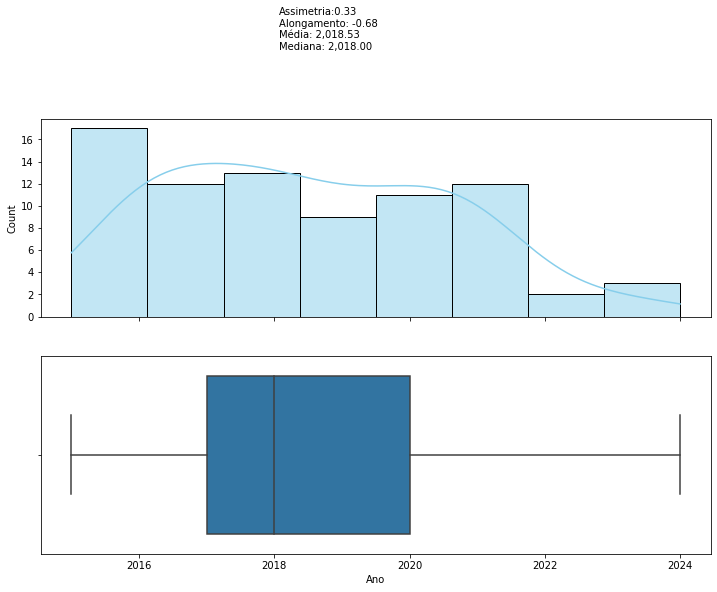

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

sb.histplot(data = df, x = 'Ano', kde=True, color="skyblue", ax=axs[0])
sb.boxplot(data = df,  x = 'Ano', orient= 'h', ax=axs[1])

texto = f"Assimetria:{df['Ano'].skew():,.2f}\nAlongamento: {df['Ano'].kurt():,.2f}\
\nMédia: {df['Ano'].mean():,.2f}\nMediana: {df['Ano'].quantile(0.5):,.2f}"
fig.text(x=0.4, y=1, s=texto)

plt.show()